# Small Data Project on Classification: Diabetes
### By Darian Jimenez

## Introduction
The goal of this project is to create a predictive model that can tell if someone has diabetes or not based on various binary factors such as if they're physically active, their sex, if they eat fruit, if they smoke, if they have had a stroke in the past, etc. It also contains various general health questions such as BMI, mental health, and age. In total there are 21 factors which will be used to determine if someone has diabetes or not. 

To run this model, I will be using the following dataset: 
* https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset  

This data was collected by The Behavioral Risk Factor Surveillance System (BRFSS), a health-related telephone survey that is collected annually by the CDC. This particular dataset is from 2015, with 253,680 individual responses and 21 features. Along with the column containing data on whether the person is diabetic, the dataset contains the following parameters:
* If they have high Blood Pressure
* If they have high Cholesterol
* If they've had a Cholesterol check within the last 5 years
* Their BMI
* If they smoke
* If they've had a stroke
* If coronary heart disease (CHD) or myocardial infarction (MI)
* If they've been physically active within the past 30 days
* If they eat fruit at least once a day
* If they eat vegetables at least once a day
* If they are heavy drinkers
* If they have health care coverage
* If there was a time in the past 12 months when they needed to see a doctor but could not because of cost
* Their overall health on a scale of 1-5
* Their mental health on a scale of 0-30
* Their physical health on a scale of 0-30
* If they have difficulty walking
* Their sex (0 = female 1 = male)
* Their age (Based on 13 categories)
* Their education level on a scale of 1-6
* Their income level on a scale of 1-8

(For yes or no answers, 0 = no and 1 = yes) 

#### How well should this Algorithm work to provide value? Who are our Stakeholders?
The accuracy model is important if it is planned to be used as a pre-screening for diabetes before officially confirming with a doctor. This could be very helpful to those with little access to medicine or who are concerned about their health and wish to determine if their symptoms and habits may be unhealthy. However, we must also consider negative implications of this model. Stakeholders such as the elderly or those with obesity may become over reliant on these predictions if given personal access to it and may neglect going in for doctor facilitated routine check-ups. Incorrect predictions may also have unintended mental health consequences for those that receive a false positive as it may unnecessarily cause someone stress. It may also further deteriorate the physical health of someone that gets a false negative for diabetes (if they continue an unhealthy lifestyle, they may worsen their diabetes). 

Thus, this demonstrates why it is important to have a high accuracy for the model. An accuracy of around 95% or higher would be enough for the model as it is not meant to be a replacement for blood work, but simply a way to make people more aware of their health. After inputting their data, a person could get an early prediction of whether they have diabetes and then go to the doctor to confirm the results. The model should also have a fairly high recall because as mentioned before, although we want to avoid false positives because those could temporarily cause distress, they are much better than the alternative of a person getting a false negative and continuing to live their life with unhealthy habits, thus worsening their condition. 

#### How will we know if the model is working well?
We will know if the model is working well if we have a high accuracy (as mentioned before), and recall as mentioned before. Precision is also important, however not at the cost of recall. We also want to ensure that our model isn't overfitted and that our confusion matrix contains a limited amount of false negatives and false positives. 

#### Creating Our Model
Using this dataset, I will create three iterations of my model, improving and tweaking different aspects of it every time. To start, the following is the first iteration of the model. In this iteration we are creating an MLP model with 2 layers, 500 epochs, and a learning rate of 0.01. We will also be plotting training and validation loss to check for overfitting, and plotting the accuracy, precision, and recall metrics to test how our model is performing, as aforementioned. 

## Model Iteration 1

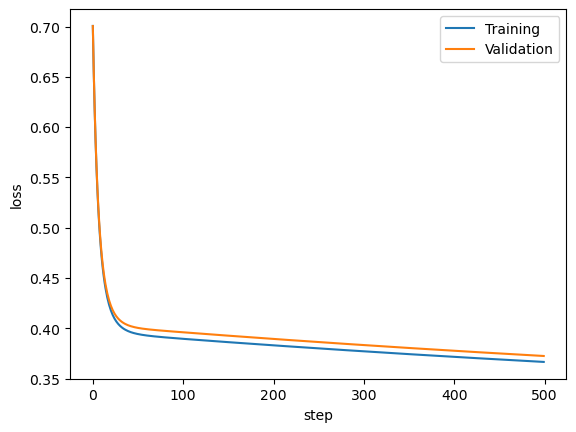

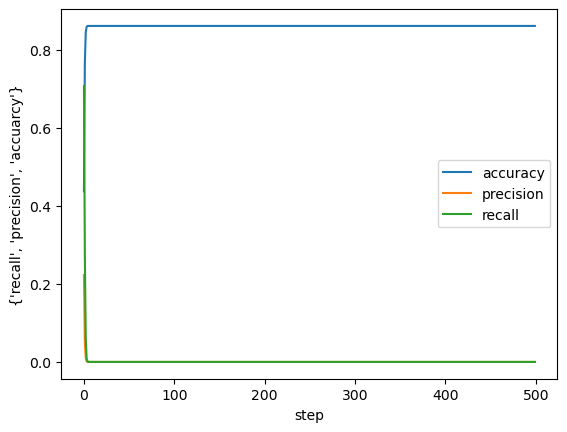

In [109]:
# Import necessary modules and libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load data from CSV
data = pd.read_csv('diabetes1.csv')

# Drop and target diabetes column
X = data.drop('Diabetes_binary', axis=1) 
y = data['Diabetes_binary'] 

# Split the data into training and test sets
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, 
                                                                          y, 
                                                                          test_size=0.3, 
                                                                          random_state=42)
# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, 
                                                  y_train_validation, 
                                                  test_size=0.3, 
                                                  random_state=42)

# Scale the features of the dataset
scaler = StandardScaler()

# Fit and transform the scaler on training data, and apply it to validation and test data
X_train = scaler.fit_transform(X_train) 
X_validation = scaler.transform(X_validation) 
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_validation_tensor = torch.FloatTensor(X_validation)
X_test_tensor = torch.FloatTensor(X_test)

# Convert labels to Pytorch tensors
y_train_tensor = torch.LongTensor(y_train.values)
y_validation_tensor = torch.LongTensor(y_validation.values)
y_test_tensor = torch.LongTensor(y_test.values) 

# Create MLP (Multi-Layer Perceptron) model
class MLP(nn.Module):
    '''
    Multi-Layer Perceptron (MLP) neural network

    Attributes:
        linear_1: First linear transformation layer
        linear_2: Second linear transformation layer 
    '''
    def __init__(self, input_size, hidden_size, num_classes):
        """
        Initialize MLP model.

        Args:
            input_size: Int containing number of input features
            hidden_size: Int containing number of neurons in the hidden layer
            num_classes: Int containing number of output classes
        """
        super(MLP, self).__init__()
        self.linear_1 = nn.Linear(input_size, hidden_size) # Input to hidden layer
        self.linear_2 = nn.Linear(hidden_size, num_classes) # Hidden layer to output layer

    def forward(self, x): # Forward pass
        """
        Perform forward pass of the MLP model

        Args:
            x: Input tensor containing the data

        Returns:
            Tensor containing model predictions for each class
        """
        out = self.linear_1(x) # layer 1
        out = F.sigmoid(out) # gives non-linearity 
        out = self.linear_2(out) # layer 3
        return out

# Instantiate Model
input_size = X_train.shape[1] # Number of input data features
hidden_size = 64 # Neurons in hidden layer
num_classes = 2
model = MLP(input_size, hidden_size, num_classes)

# Loss function and optimizer
n_epochs = 500 # Amount of training epochs
learning_rate = 0.01 # Optimizer learning rate
criterion = nn.CrossEntropyLoss() # Define the loss function
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Store losses in arrays
train_losses = np.zeros((n_epochs,))
validation_losses = np.zeros((n_epochs,))
test_losses = np.zeros((n_epochs,))

# Store accuracy, precision, and recall values 
accuracies = np.zeros((n_epochs,))
precisions = np.zeros((n_epochs,))
recall = np.zeros((n_epochs,))

for epoch in range(n_epochs):
    model.train() # Set model to train mode
    optimizer.zero_grad() # Reset the gradients of the optimizer before backward pass
    outputs = model(X_train_tensor) # Forward pass through model
    loss = criterion(outputs, y_train_tensor) # Compute loss 
    train_losses[epoch] = loss.item() # Store loss
    
    model.eval() # Set model to evaluation mode
    with torch.no_grad():
        # Validation data
        validation_outputs = model(X_validation_tensor) # Forward pass through validation data
        validation_loss = criterion(validation_outputs, y_validation_tensor) # Compute loss 
        validation_losses[epoch] = validation_loss.item() # Store loss

        # Test data
        test_outputs = model(X_test_tensor) # Forward pass through test data
        test_loss = criterion(test_outputs, y_test_tensor) # Compute loss
        test_losses[epoch] = test_loss.item() # Store loss

        # Calculate and store accuracy, precision, and recall
        accuracies[epoch] = (torch.sum(test_outputs.argmax(dim=1) == y_test_tensor) / y_test_tensor.shape[0]).item()
        precisions[epoch] = precision_score(y_test, test_outputs.argmax(dim=1) == y_test_tensor)
        recall[epoch] = recall_score(y_test, test_outputs.argmax(dim=1) == y_test_tensor)

    # Backward pass through data 
    loss.backward()
    optimizer.step()

# Plot training and validation loss over epochs
plt.figure()
plt.plot(range(n_epochs), train_losses, label='Training')
plt.plot(range(n_epochs), validation_losses, label='Validation')
plt.xlabel('step')
plt.ylabel('loss')
plt.legend()
plt.show()

# Plot accuracy values
plt.figure()
plt.plot(range(n_epochs), accuracies, label = 'accuracy')
plt.plot(range(n_epochs), precisions, label = 'precision')
plt.plot(range(n_epochs), recall, label = 'recall')
plt.xlabel('step')
plt.ylabel({'accuarcy', 'precision', 'recall'})
plt.legend()
plt.show()

As seen by the graph above, with very little difference in training and validation data, our model seems to be fairly accurate. However, we can see that our model is slightly overfitted as the training loss slightly lowers while the validation curve rises. 

Again, the model seems to already be fairly accurate, likely due to the highly predictive factors chosen to predict if someone had diabetes such as high blood pressure, BMI, etc. Although this model may seem adequate, it's important that our model is highly accurate, because as aforementioned, it is responsible for predicting very sensitive and life changing diagnoses. This fairly high accuracy could also be due to the model being highly imbalanced, and it simply has a high accuracy because not having diabetes is much more prevalent in the data, leading to the model having a high accuracy simply due to it the majority class most of the time. 

Unfortunately, our precision and recall seem to be very low, which I again assume to be a result of the dataset being highly imbalanced. A highly imbalanced dataset may focus too much on the majority class of the data, leading to a low precision for the minority class as it struggles to predict it correctly. The same goes for recall where it doesn't perform well for the minority class. In our model both precision and recall rapidly approach and stay at 0, which is an indication that we still have a long way to go before our model is viable for use. 

For this reason, we will continue to iterate on our model to reach a higher accuracy value. 

## Model Iteration 2

For the second iteration of our model, my first adjustment is to add more hidden layers to the neural network. To prevent the model from further overfitting, I will also add dropout layers to the model which randomly drops specific neurons while training the model, which then prevents the model from becoming too reliant on them, and thus, preventing overfitting.

I also increased the number of epochs from 500 to 1000 because due to the dropout implementation, we should be less concerned of overfitting. 

Lastly, and likely more importantly, the original dataset I used from Kaggle came with another dataset which was perfectly split 50/50 into people with diabetes and people without. This should significantly improve what we see for precision and recall as this would fix the dataset imbalance. This new dataset contains 70,692 responses.

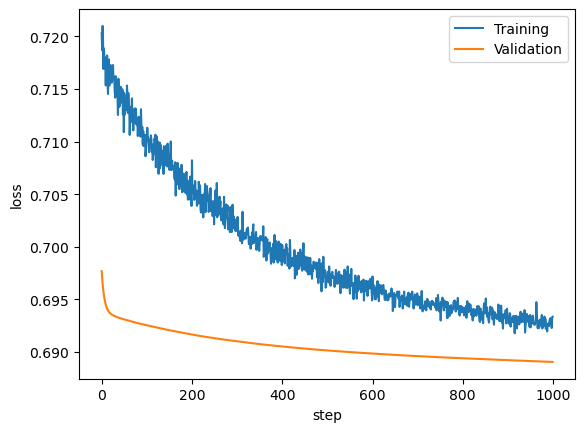

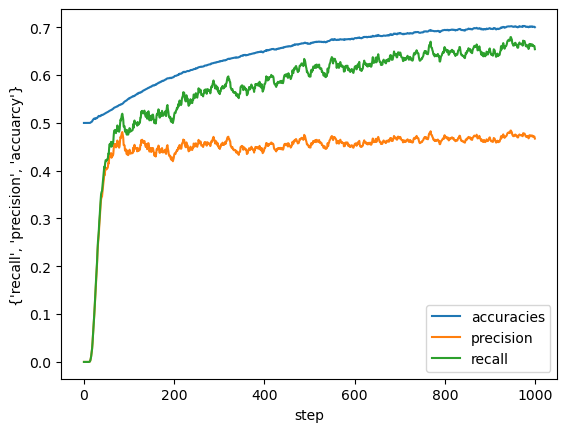

In [118]:
# Load data from CSV
data = pd.read_csv('diabetes5050.csv')

# Drop and target diabetes column
X = data.drop('Diabetes_binary', axis=1) 
y = data['Diabetes_binary'] 

# Split the data into training and test sets
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, 
                                                                          y, 
                                                                          test_size=0.3, 
                                                                          random_state=42)
# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, 
                                                  y_train_validation, 
                                                  test_size=0.3, 
                                                  random_state=42)
# Scale the features of the dataset
scaler = StandardScaler()

# Fit and transform the scaler on training data, and apply it to validation and test data
X_train = scaler.fit_transform(X_train) 
X_validation = scaler.transform(X_validation) 
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_validation_tensor = torch.FloatTensor(X_validation)
X_test_tensor = torch.FloatTensor(X_test)

# Convert labels to Pytorch tensors
y_train_tensor = torch.LongTensor(y_train.values)
y_validation_tensor = torch.LongTensor(y_validation.values)
y_test_tensor = torch.LongTensor(y_test.values)

# Create MLP (Multi-Layer Perceptron) model
class MLP(nn.Module):
    '''
    Multi-Layer Perceptron (MLP) neural network

    Attributes:
        linear_1: First linear transformation layer
        linear_2: Second linear transformation layer 
        linear_3: Third linear transformation layer 
        dropout_1: Dropout layer between the linear layers 1 and 2
        dropout_2: Dropout layer between the linear layers 2 and 3
    '''
    def __init__(self, input_size, hidden_size_1, hidden_size_2, num_classes):
        """
        Initialize MLP model

        Args:
            input_size: Int containing number of input features
            hidden_size_1: Int containing number of neurons in the first hidden layer
            hidden_size_2: Int containing number of neurons in the second hidden layer
            num_classes: Int containing number of output classes
        """
        super(MLP, self).__init__()
        self.linear_1 = nn.Linear(input_size, hidden_size_1) # Input to hidden layer 1
        self.dropout_1 = nn.Dropout(p=0.5) # Apply dropout 
        self.linear_2 = nn.Linear(hidden_size_1, hidden_size_2) # Input to hidden layer 2
        self.dropout_2 = nn.Dropout(p=0.5) # Apply dropout 
        self.linear_3 = nn.Linear(hidden_size_2, num_classes) # Hidden layer 2 to output layer

    def forward(self, x): # Forward pass
        """
        Perform forward pass of the MLP model

        Args:
            x: Input tensor containing the data

        Returns:
            Tensor containing model predictions for each class
        """
        out = self.linear_1(x) # layer 1
        out = F.sigmoid(out) # Gives non-linearity 
        out = self.dropout_1(out) # Apply dropout 
        out = self.linear_2(out) # layer 2
        out = F.sigmoid(out) # Gives non-linearity 
        out = self.dropout_2(out) # Apply dropout 
        out = self.linear_3(out) # layer 3
        return out

# Instantiate Model
input_size = X_train.shape[1] # Number of input data features
hidden_size_1 = 128 # Neurons in hidden layer 1
hidden_size_2 = 64 # Neurons in hidden layer 2
num_classes = 2 # Output layer
model = MLP(input_size, hidden_size_1, hidden_size_2, num_classes)

# Loss function and optimizer
n_epochs = 1000 # Amount of training epochs
learning_rate = 0.01 # Optimizer learning rate
criterion = nn.CrossEntropyLoss() # Define the loss function
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Store losses in arrays
train_losses = np.zeros((n_epochs,))
validation_losses = np.zeros((n_epochs,))
test_losses = np.zeros((n_epochs,))

# Store accuracy, precision, and recall values 
accuracies = np.zeros((n_epochs,))
precisions = np.zeros((n_epochs,))
recall = np.zeros((n_epochs,))

for epoch in range(n_epochs):
    model.train() # Set model to train mode
    optimizer.zero_grad() # Reset the gradients of the optimizer before backward pass
    outputs = model(X_train_tensor) # Forward pass through model
    loss = criterion(outputs, y_train_tensor) # Compute loss 
    train_losses[epoch] = loss.item() # Store loss
    
    model.eval() # Set model to evaluation mode
    with torch.no_grad():
        # Validation data
        validation_outputs = model(X_validation_tensor) # Forward pass through validation data
        validation_loss = criterion(validation_outputs, y_validation_tensor) # Compute loss 
        validation_losses[epoch] = validation_loss.item() # Store loss

        # Test data
        test_outputs = model(X_test_tensor) # Forward pass through test data
        test_loss = criterion(test_outputs, y_test_tensor) # Compute loss
        test_losses[epoch] = test_loss.item() # Store loss

        # Calculate and store accuracy, precision, and recall
        accuracies[epoch] = (torch.sum(test_outputs.argmax(dim=1) == y_test_tensor) / y_test_tensor.shape[0]).item()
        precisions[epoch] = precision_score(y_test, test_outputs.argmax(dim=1) == y_test_tensor)
        recall[epoch] = recall_score(y_test, test_outputs.argmax(dim=1) == y_test_tensor)

    # Backward pass through data 
    loss.backward()
    optimizer.step()

# Plot training and validation loss over epochs
plt.figure()
plt.plot(range(n_epochs), train_losses, label='Training')
plt.plot(range(n_epochs), validation_losses, label='Validation')
plt.xlabel('step')
plt.ylabel('loss')
plt.legend()
plt.show()

# Plot accuracy values
plt.figure()
plt.plot(range(n_epochs), accuracies, label = 'accuracies')
plt.plot(range(n_epochs), precisions, label = 'precision')
plt.plot(range(n_epochs), recall, label = 'recall')
plt.xlabel('step')
plt.ylabel({'accuarcy', 'precision', 'recall'})
plt.legend()
plt.show()

As seen by the graph above, the model improved significantly. Our training and validation loss seem slightly more far apart than before, however, they still appear close enough that overfitting doesn't appear to be too much of an issue. As seen above, the precision and recall seem to increase as we train the model which is a big improvement from our last run. Unfortunately, accuracy seems to have taken a hit but that it to be expected with a more balanced dataset as mentioned before. 

The model also has a very fast convergence, meaning the model is trained very quickly. This means that at the current learning rate, the model does not need as many epochs to reach peak accuracy, however it may be interesting to look at the effects of changing it.

## Model Iteration 3

Moving on to the third iteration of the model, I will be testing another activation function ReLU to test if it works better than the sigmoid function. We can also change the optimizer, this time using the Adam optimizer instead of the SGD to see its effects. 

Now that we aren't as at risk of overfitting as seen by the last model, we can also increase the number of epochs to 2000 to provide the model with more learning opportunities. Lastly, we can lower the learning rate to 0.001 to prevent overshooting the minimum of the loss function and see if the predicted slower convergence will have any negative effect on the model.

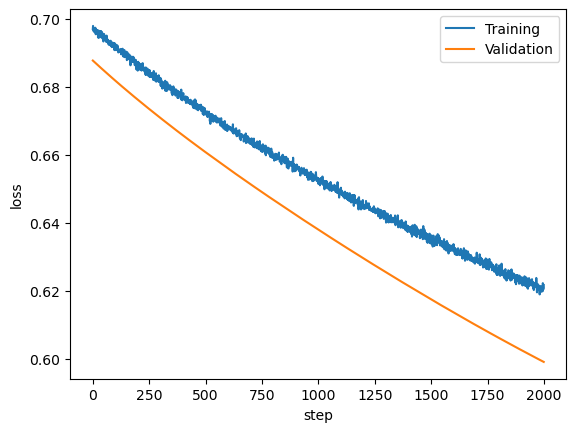

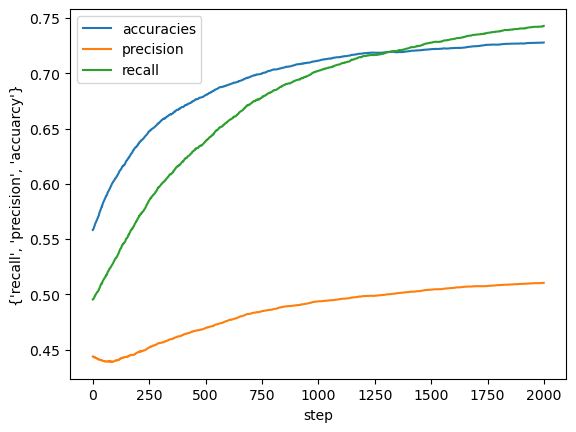

In [115]:
# Load data from CSV
data = pd.read_csv('diabetes5050.csv')

# Drop and target diabetes column
X = data.drop('Diabetes_binary', axis=1) 
y = data['Diabetes_binary'] 

# Split the data into training and test sets
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, 
                                                                          y, 
                                                                          test_size=0.3, 
                                                                          random_state=42)
# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, 
                                                  y_train_validation, 
                                                  test_size=0.3, 
                                                  random_state=42)
# Scale the features of the dataset
scaler = StandardScaler()

# Fit and transform the scaler on training data, and apply it to validation and test data
X_train = scaler.fit_transform(X_train) 
X_validation = scaler.transform(X_validation) 
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_validation_tensor = torch.FloatTensor(X_validation)
X_test_tensor = torch.FloatTensor(X_test)

# Convert labels to Pytorch tensors
y_train_tensor = torch.LongTensor(y_train.values)
y_validation_tensor = torch.LongTensor(y_validation.values)
y_test_tensor = torch.LongTensor(y_test.values)

# Create MLP (Multi-Layer Perceptron) model
class MLP(nn.Module):
    '''
    Multi-Layer Perceptron (MLP) neural network

    Attributes:
        linear_1: First linear transformation layer
        linear_2: Second linear transformation layer 
        linear_3: Third linear transformation layer 
        dropout_1: Dropout layer between the linear layers 1 and 2
        dropout_2: Dropout layer between the linear layers 2 and 3
    '''
    def __init__(self, input_size, hidden_size_1, hidden_size_2, num_classes):
        """
        Initialize MLP model

        Args:
            input_size: Int containing number of input features
            hidden_size_1: Int containing number of neurons in the first hidden layer
            hidden_size_2: Int containing number of neurons in the second hidden layer
            num_classes: Int containing number of output classes
        """
        super(MLP, self).__init__()
        self.linear_1 = nn.Linear(input_size, hidden_size_1) # Input to hidden layer 1
        self.dropout_1 = nn.Dropout(p=0.5) # Apply dropout 
        self.linear_2 = nn.Linear(hidden_size_1, hidden_size_2) # Input to hidden layer 2
        self.dropout_2 = nn.Dropout(p=0.5) # Apply dropout 
        self.linear_3 = nn.Linear(hidden_size_2, num_classes) # Hidden layer 2 to output layer

    def forward(self, x): # Forward pass
        """
        Perform forward pass of the MLP model

        Args:
            x: Input tensor containing the data

        Returns:
            Tensor containing model predictions for each class
        """
        out = self.linear_1(x) # layer 1
        out = F.relu(out) # Gives non-linearity 
        out = self.dropout_1(out) # Apply dropout 
        out = self.linear_2(out) # layer 2
        out = F.relu(out) # Gives non-linearity 
        out = self.dropout_2(out) # Apply dropout 
        out = self.linear_3(out) # layer 3
        return out

# Instantiate Model
input_size = X_train.shape[1] # Number of input data features
hidden_size_1 = 128 # Neurons in hidden layer 1
hidden_size_2 = 64 # Neurons in hidden layer 2
num_classes = 2 # Output layer
model = MLP(input_size, hidden_size_1, hidden_size_2, num_classes)

# Loss function and optimizer
n_epochs = 2000 # Amount of training epochs
learning_rate = 0.001 # Optimizer learning rate
criterion = nn.CrossEntropyLoss() # Define the loss function
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Store losses in arrays
train_losses = np.zeros((n_epochs,))
validation_losses = np.zeros((n_epochs,))
test_losses = np.zeros((n_epochs,))

# Store accuracy, precision, and recall values 
accuracies = np.zeros((n_epochs,))
precisions = np.zeros((n_epochs,))
recall = np.zeros((n_epochs,))

for epoch in range(n_epochs):
    model.train() # Set model to train mode
    optimizer.zero_grad() # Reset the gradients of the optimizer before backward pass
    outputs = model(X_train_tensor) # Forward pass through model
    loss = criterion(outputs, y_train_tensor) # Compute loss 
    train_losses[epoch] = loss.item() # Store loss
    
    model.eval() # Set model to evaluation mode
    with torch.no_grad():
        # Validation data
        validation_outputs = model(X_validation_tensor) # Forward pass through validation data
        validation_loss = criterion(validation_outputs, y_validation_tensor) # Compute loss 
        validation_losses[epoch] = validation_loss.item() # Store loss

        # Test data
        test_outputs = model(X_test_tensor) # Forward pass through test data
        test_loss = criterion(test_outputs, y_test_tensor) # Compute loss
        test_losses[epoch] = test_loss.item() # Store loss

        # Calculate and store accuracy, precision, and recall
        accuracies[epoch] = (torch.sum(test_outputs.argmax(dim=1) == y_test_tensor) / y_test_tensor.shape[0]).item()
        precisions[epoch] = precision_score(y_test, test_outputs.argmax(dim=1) == y_test_tensor)
        recall[epoch] = recall_score(y_test, test_outputs.argmax(dim=1) == y_test_tensor)

    # Backward pass through data 
    loss.backward()
    optimizer.step()

# Plot training and validation loss over epochs
plt.figure()
plt.plot(range(n_epochs), train_losses, label='Training')
plt.plot(range(n_epochs), validation_losses, label='Validation')
plt.xlabel('step')
plt.ylabel('loss')
plt.legend()
plt.show()

# Plot accuracy values
plt.figure()
plt.plot(range(n_epochs), accuracies, label = 'accuracies')
plt.plot(range(n_epochs), precisions, label = 'precision')
plt.plot(range(n_epochs), recall, label = 'recall')
plt.xlabel('step')
plt.ylabel({'accuarcy', 'precision', 'recall'})
plt.legend()
plt.show()

As predicted, the model now has a slower convergence, however, this time it appears we have quite significant overfitting, which is likely due to the slower learning rate. 

This version of the model seems to work somewhat well as compared the second iteration, just with more time needed to run the model. This means that although this model could viable, in a real world usage, it may be more useful to run the second iteration as it is able to trian much faster. The second model also doesn't appear to suffer from overfitting as this iteration does. We also don't seem to have a dramatic increase in accuracy, precision, and recall, therefore we will be using the second iteration of our model to run the following visualizations. 

## Visualization 1: Correlation Matrix

Our first visualization of the data is a correlation matrix. This could be useful to test how strong relationships are between data. For example BMI and if someone exercises may be heavily correlated. This is interesting as it could potentially tell our stakeholders how to be healthier by changing one or more aspects of their lives, which may have a great impact on how high of a risk they have for diabetes. For example, visualizing the data helps us see that a persons general health has a fairly significant negative correlation with their physical activity levels. Thus, we can tell the patient that increasing their physical activity levels may lead to a higher general health, which in turn leads to a lower chance of diabetes (as seen by the significant correlation between the diabetes binary value and general health). 

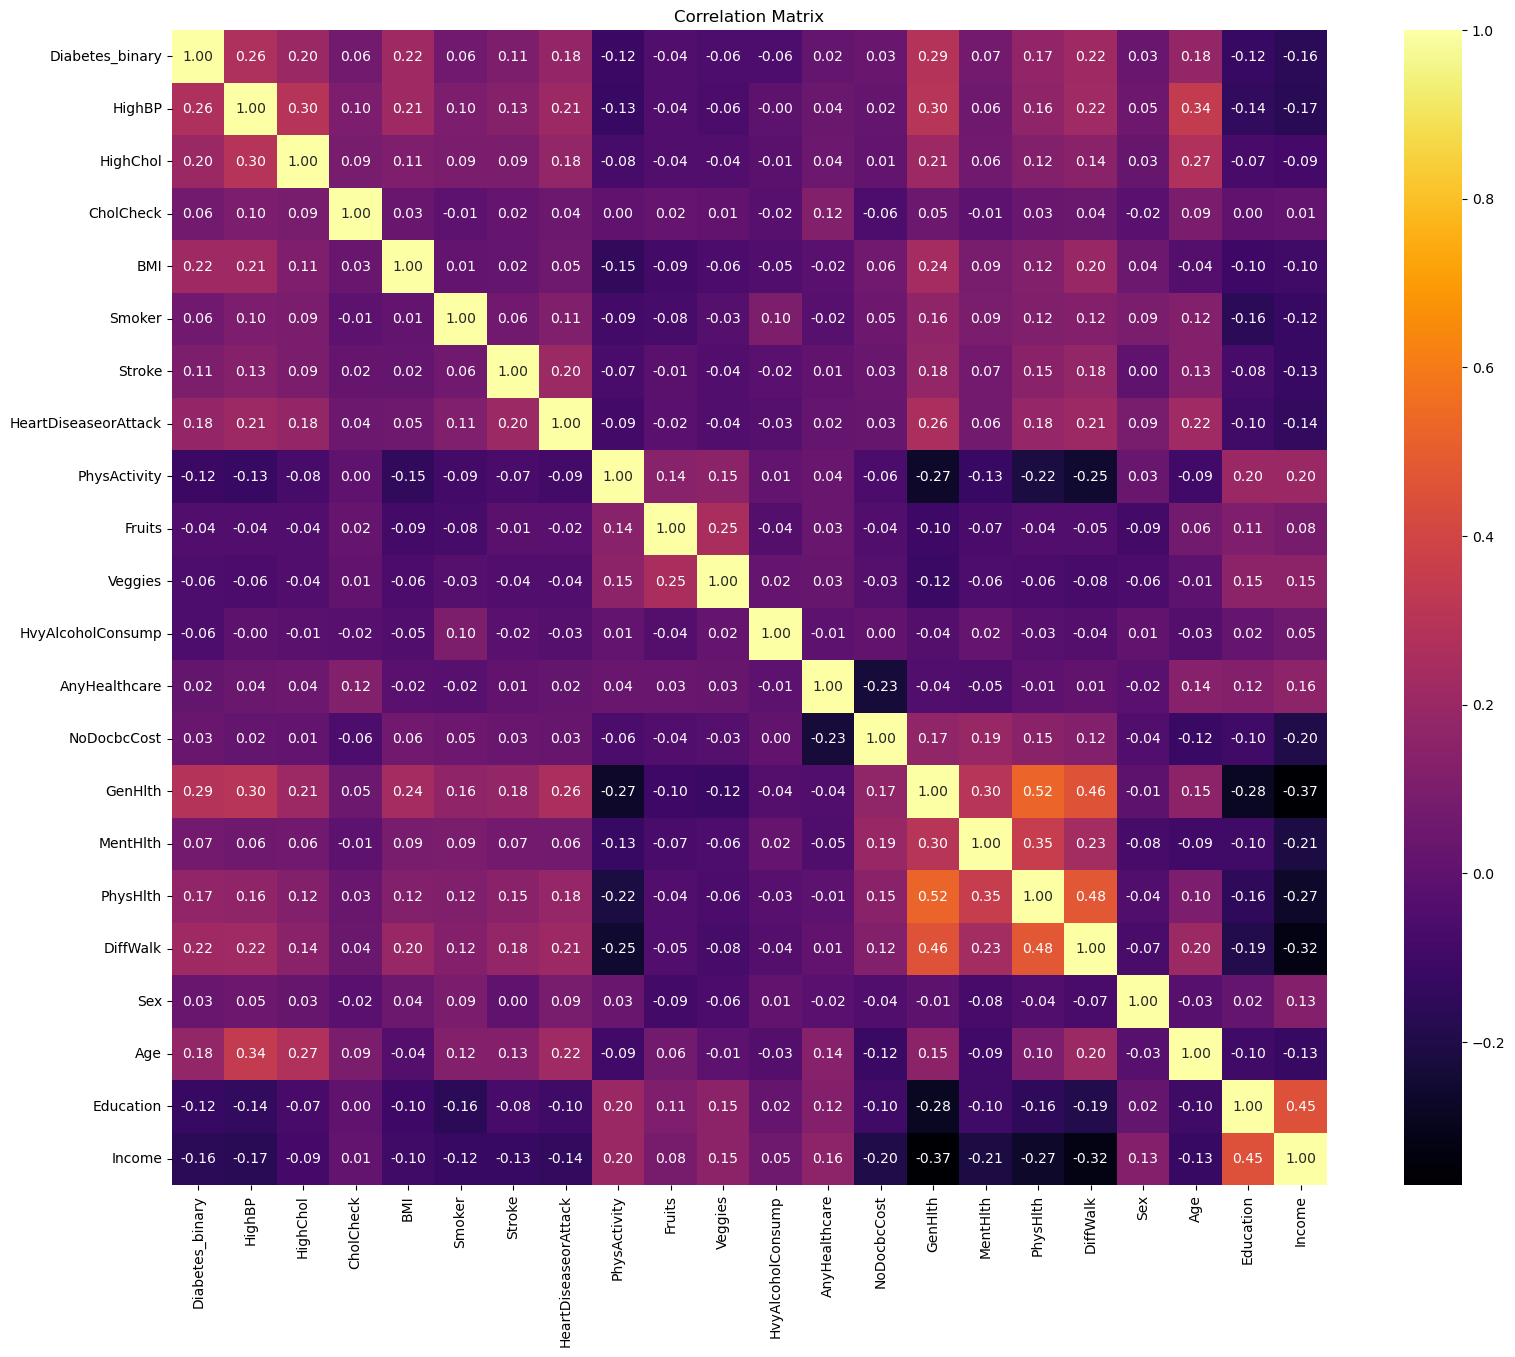

In [89]:
# Import necessary seaborn module
import seaborn as sns

df = pd.DataFrame(data) # Create dataframe
correlation_matrix = df.corr() # Create correlation matrix

# Plot Correlation Matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='inferno', square=True)
plt.title('Correlation Matrix')
plt.show()

## Visualization 2: Confusion Matrix

Our second visualization is a confusion matrix. This matrix tells us many valuable things about our model, namely: the amount of true positives, true negatives, false positives, and false negatives. Looking at these values we can better tell how well our model is working. As mentioned in the introduction, here we can forgive false positives, but in the future, we want to minimize the amount of false negatives found in the model as this can severely negatively impact any stakeholders.

#### Limitations and effectiveness based on this visualization
Printing out accuracy, precision, and recall, we can see that we have an accuracy of around .70 which is not quite our anticipated accuracy of 95% as initially described. As seen in the correlation matrix above, we are likely limited by our training data as although you may expect higher correlations between the values, the highest correlation between a value and having diabetes is between general health and diabetes which is only 0.29. Relating this to accuracy, we may be limited by the values offered by the dataset, or even just the fact that most of the data is binary. For example, a specific number for blood pressure could really help us discern between people with slightly high or very high blood pressure and possibly help the model have a higher accuracy. Training and testing the model on this more varied dataset, would likely lead to significant improvements in the models overall accuracy. 

Touching on recall and precision, it seems that in this case, recall is quite low which is the opposite of what we wanted, thus if we wanted to provide this model for the general population to use, then we would have to improve this value substantially, and decrease the number of false negatives. In general, this model is not yet suited for real world use due to its effectiveness and lack of more comprehensive data points which aren't simply binary.

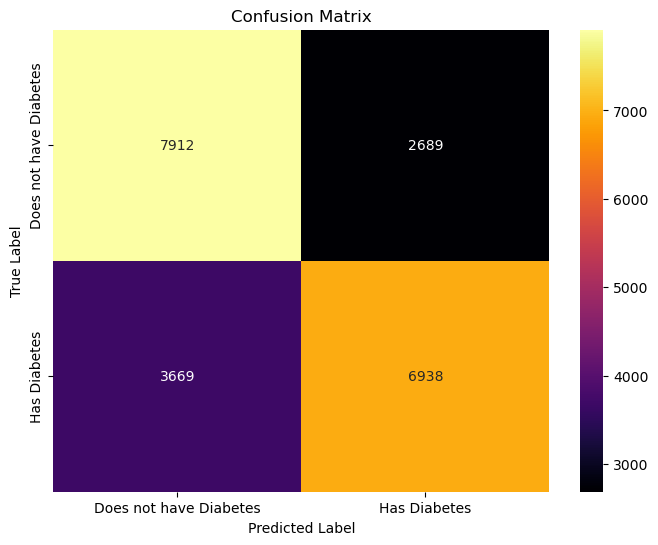

Accuracy: 0.700207468879668
Precision: 0.7206814168484471
Recall: 0.654096351466013


In [122]:
# Import necessary libraries for metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns 

# Generate confusion matrix
matrix = confusion_matrix(y_test_tensor, test_outputs.argmax(dim=1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='inferno',
            xticklabels=['Does not have Diabetes', 'Has Diabetes'],
            yticklabels=['Does not have Diabetes', 'Has Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print accuracy, precision, and recall
accuracy = accuracy_score(y_test, test_outputs.argmax(dim=1))
print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, test_outputs.argmax(dim=1))
print(f'Precision: {precision}')
recall = recall_score(y_test, test_outputs.argmax(dim=1))
print(f'Recall: {recall}')

## Visualization 3: Precision-Recall Curve

The final visualization is a Precision-Recall Curve, which is especially important for the initial dataset as it is very unbalanced. For that particular dataset, that means there are many more people who don't have diabetes than do have diabetes (218,334 vs 35,346 respectively). The problem with this is that accuracy alone doesn't tell the entire story as it's very possible that the model is simply highly accurate because it's predicting the more common outcome more often. That said, in this case we are still training the model on the data split evenly 50/50 into people with and without diabetes. This visualization would show us how well the model visualizes true positives. In our case we likely want a high recall instead of a high precision as a high recall would mean the model flags more patients as diabetic even though they may not be, which could cause the patient some stress. Again however, this is better than the alternative scenario with a high precision as the model would only flag patients it is sure have diabetes, meaning it would end up missing more patients and thus putting them at danger of continuing their bad habits. 

Plotting the curve below, we can see the negative relationship between precision and recall which is to be expected. As mentioned in the introduction we want a higher recall, thus looking at this visualization gives us more insight on how we could potentially balance precision and recall better were we to make more iterations of our model. 

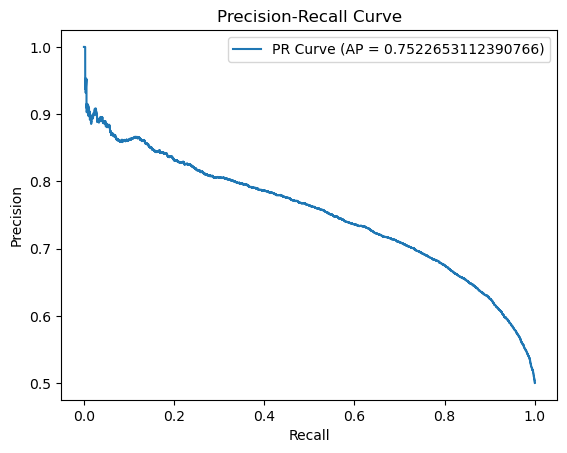

In [121]:
from sklearn.metrics import precision_recall_curve, average_precision_score

model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    probabilities = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()  # Probabilities for class 1

# Convert y_test_tensor to numpy array
y_test = y_test_tensor.cpu().numpy()

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Calculate average precision score
average_precision = average_precision_score(y_test, probabilities)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label=f'PR Curve (AP = {average_precision})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## Conclusion

#### Revisited effectiveness and limitations
To conclude, our model seems to be somewhat effective, but not enough for the use case we intended of having it predict diabetes for people. With an accuracy of around 70, we would need at least 90% for the model to be considered viable for use with the general population. As seen by the confusion matrix, we also have quite a few false negatives and false positives, which we don't want if we want a highly accurate model. This is especially true for false negatives as it could give people the false impression that they don't have diabetes, which could make their health decline more. 

Despite this, from the training we did do on the model, the recall and precision seem to be viable, at least according to the graphs that go along with my iterations, which I'm sure if we kept training the model, we would get much higher values. Looking at the correlation matrix, we seem to have a couple values (BMI, High blood pressure, physical activity, etc.) that correlate well with diabetes and thus more emphasis on those values may prove useful when training our model. 

#### Next steps
Although we didn't get the model as accurate as we could have hoped, it was interesting to see how changing different values and experimenting with the model affected training and validation loss, along with accuracy, precision, and recall. For now, although the model should likely not be used in a real world situation, the model could continue to be tested with real world data for people who do and don't have diabetes to test if it is as accurate as we believe it is. It may also be helpful to add additional data to the dataset that aren't binary values and check which types of data affect the model the most. It may also be interesting to remove data columns and see how that affects the model's accuracy and testing which single factors are most predictive of diabetes, which could be predicted using the previously plotted correlation matrix. 